# Word Embeddings

Implement cosine similarities from scratch and solve some word analogy problems with pre-trained word vectors.

## A. Load Pre-trained GloVe Word Vectors with Gensim

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader
import numpy as np

In [ ]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

In [ ]:
print('data type:', type(glove_vectors.vectors))
print('# words:', glove_vectors.vectors.shape[0])
print('Embedding dimension:', glove_vectors.vectors.shape[1])

data type: <class 'numpy.ndarray'>
# words: 400000
Embedding dimension: 50


## B. Given a query word, find the top 10 words in the vocabulary that have the highest cosine similarity scores

In [ ]:
glove_vectors.most_similar('cat', topn=10)

[('dog', 0.9218006134033203),
 ('rabbit', 0.8487821221351624),
 ('monkey', 0.8041081428527832),
 ('rat', 0.7891963124275208),
 ('cats', 0.7865270972251892),
 ('snake', 0.7798910737037659),
 ('dogs', 0.7795814871788025),
 ('pet', 0.7792249917984009),
 ('mouse', 0.773166835308075),
 ('bite', 0.7728800177574158)]

## Implement `my_most_similar()` that will do the same thing as the built-in `most_similar()` function above


In [ ]:
glove_vectors.get_index('apple') # get the index of a word in the vocabulary

3292

In [ ]:
glove_vectors.index_to_key[3292] # index to word

'apple'

In [ ]:
word = 'apple'
glove_vectors.get_vector(word) # get the word vector of a word

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ], dtype=float32)

In [ ]:
def my_most_similar(glove_vectors, query_word, topn):
    """
    Find the most similar words to a given query word based on cosine similarity in the GloVe embedding space.

    Args:
        glove_vectors (Gensim KeyedVectors)
        query_word (str): The word for which to find the most similar words.
        topn (int): The number of most similar words to return.

    Returns:
        list of tuples:
            - Each tuple contains a word (str) and its corresponding cosine similarity score (float) to the query word.
            - The list is sorted in descending order of cosine similarity.
    """
    W = glove_vectors.vectors

    if query_word not in glove_vectors:
        raise ValueError(f"'{query_word}' not in vocabulary.")

    query_vec = glove_vectors[query_word]

    similarities = []

    for word in glove_vectors.index_to_key:
        if word == query_word:
            continue
        word_vec = glove_vectors[word]
        cosine_sim = np.dot(query_vec, word_vec) / (np.linalg.norm(query_vec) * np.linalg.norm(word_vec))
        similarities.append((word, cosine_sim))

    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

    my_list = similarities[:topn]

    assert len(my_list) == topn
    return my_list

## C. What are the highest and lowest vector norms among all the word vectors? Answer with two values.

In [ ]:
#Your code here
def find_max_min_vector_norm(glove_vectors):
    """
    Find the maximum and minimum vector norms among all word vectors in the GloVe embeddings.

    Args:
        glove_vectors (Gensim KeyedVectors)

    Returns:
        max_vector_norm (float): The highest vector norm.
        min_vector_norm (float): The lowest vector norm.
    """
    max_vector_norm = -np.inf
    min_vector_norm = np.inf

    for word in glove_vectors.index_to_key:
        vector = glove_vectors[word]
        norm = np.linalg.norm(vector)

        max_vector_norm = max(max_vector_norm, norm)
        min_vector_norm = min(min_vector_norm, norm)

    return max_vector_norm, min_vector_norm

max_vector_norm, min_vector_norm = find_max_min_vector_norm(glove_vectors)
print(f'max_vector_norm: {max_vector_norm:.3f}, min_vector_norm: {min_vector_norm:.3f}')

max_vector_norm: 14.122, min_vector_norm: 0.047


## D. Why is cosine similarity better than dot product when calculating similarities between word vectors?

Cosine similarity is better than dot product because it only considers the direction of the vector and not the magnitude unlike dot product which factors in magnitude as well as direction. Considering only the direction is better as the magnitude depends on the frequency and the context which may skew the dot product results.

## Your implementation of `my_most_similar()` should pass the test cases below

In [ ]:
def diff_results(oracle_list, my_list):
  for oracle, mine in zip(oracle_list, my_list):
    assert oracle[0] == mine[0], "find the wrong word"
    assert np.isclose(oracle[1], mine[1]), "wrong consine similarity"

for query in ['computer', 'frog', 'car']:
  oracle_list = glove_vectors.most_similar(query, topn=10)
  my_list = my_most_similar(glove_vectors, query, topn=10)
  diff_results(oracle_list, my_list)

## E. We visualize the word embeddings with PCA below. What do you see in the figure?
- Hint: Each dot corresponds to a word vector. Do you observe any meaningful direction between related words?
- You do not need to write any code in this question

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z = pca.fit_transform(glove_vectors.vectors)

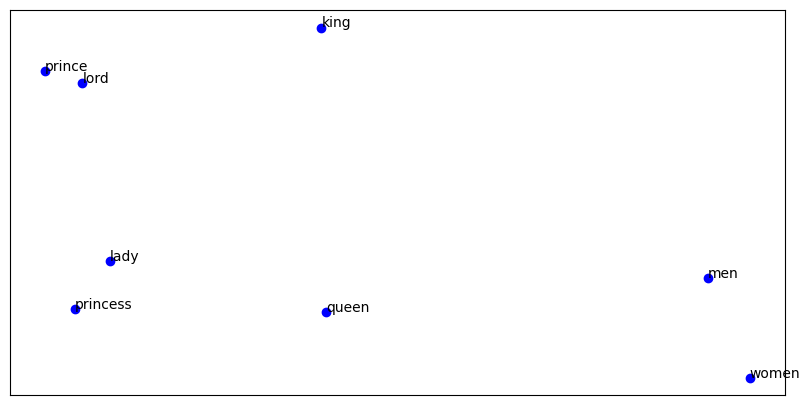

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for word in ['king', 'queen', 'lord', 'lady', 'prince', 'princess', 'men', 'women']:
  point = Z[glove_vectors.get_index(word)]
  plt.scatter(point[0], point[1], color='b')
  plt.annotate(word, (point[0], point[1]))
  plt.xticks([])
  plt.yticks([])

Ans: Similar words point in similar directions.

## F. Word Analogy: prince is to princess as lord is to?
  - word1: `prince`, word2: `princess`, word3: `lord`
  - `direction = vec(word2) - vec(word1)`
  - `vec_tgt = vec(word3) + direction`
  - Calcuate the cosine similarities between `vec_tgt` and all the words in the vocabulary, **except for word3**.
  - Return the word that has the highest cosine similarity score.

In [ ]:
def word_analogy(glove_vectors, word1, word2, word3):
    """
    Args:
        glove_vectors (Gensim KeyedVectors)
        word1 (str): The first word in the analogy.
        word2 (str): The second word in the analogy.
        word3 (str): The third word in the analogy for which to find the analogous word.

    Returns:
        pred_word (str): The word that best completes the analogy.
    """

    # Your code here
    if word1 not in glove_vectors or word2 not in glove_vectors or word3 not in glove_vectors:
        raise ValueError(f"One of the words: {word1}, {word2}, {word3} is not in the vocabulary.")

    vec1 = glove_vectors[word1]
    vec2 = glove_vectors[word2]
    vec3 = glove_vectors[word3]

    direction = vec2 - vec1
    vec_tgt = vec3 + direction

    max_sim = -np.inf
    pred_word = None

    for word in glove_vectors.index_to_key:
        if word == word3:
            continue

        word_vec = glove_vectors[word]

        cosine_sim = np.dot(vec_tgt, word_vec) / (np.linalg.norm(vec_tgt) * np.linalg.norm(word_vec))

        if cosine_sim > max_sim:
            max_sim = cosine_sim
            pred_word = word

    print(f'{word1} is to {word2} as {word3} is to? {pred_word}')
    assert pred_word != word3
    return pred_word

In [ ]:
pred_word = word_analogy(glove_vectors, 'prince', 'princess', 'lord')
pred_word = word_analogy(glove_vectors, 'aunt', 'uncle', 'queen')
pred_word = word_analogy(glove_vectors, 'london', 'england', 'paris')
pred_word = word_analogy(glove_vectors, 'cat', 'cats', 'car')

prince is to princess as lord is to? lady
aunt is to uncle as queen is to? king
london is to england as paris is to? france
cat is to cats as car is to? cars
